## Direct debit requires that a list of banking services be provided to employees base on:
* Thier place of employment
* Place of residence

This is an effort to automate the delivery of thjat information. For each employee, this script should:
1. Provide a list of banking services located within 1 (radial?) mile of their home address
2. Provide a map with the location of banking services coresponding to the list above (ennumerated?)
3. Provide a list of banking services located within 1 (radial?) mile of their work address
4. Provide a map with the location of banking services coresponding to the list above (ennumerated?)

For the purposes of this proof of concept, banking services will be defined to include:
* Bank branches
* ATM machines

Assumptions: 
1. Data will be provided in csv format
    * to include:
        * Name (First & Last)
        * Home Address
        * Office location & Address
        

## Imports


In [48]:
#Imports first

import os
import matplotlib.pyplot as plt
import requests
import pandas as pd
from googlemaps import googlemaps
import json
from PIL import Image, ImageOps
from io import BytesIO

## Import data

## Convert home address into lat-long

In [3]:
file_loc = 'C:/Users/Jonathan/DirectDebit/data/'
file_path = file_loc + 'direct_debit_clean.csv'
ouput_loc = 'C:/Users/Jonathan/DirectDebit/data/'

df_clean = pd.read_csv(file_path)

In [214]:
df_clean.head()

,Unnamed: 0,First_name,Last_name,Email,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH,OFFICE_NUMBER,OFFICE_STREET,OFFICE_CITY,OFFICE_REGION,OFFICE_POSTCODE
0,0,Brandon,Newman,brandon.newman@directdebitsample.com,-78.963960,42.441394,11337,Dewey Road,NaN,Perrysburg,Cattaraugus,NY,NaN,CATT036895,e3b613190ea934d2,366,West Main Street,Concord,NY,NaN
1,1,Dominic,Pullman,dominic.pullman@directdebitsample.com,-78.252336,42.386628,8854,County Road 7E,NaN,Rushford,Allegany,NY,NaN,ALLE005555,88146015a1da33e6,7327,Groveland Station Road,Groveland,NY,NaN
2,2,Oliver,Murray,oliver.murray@directdebitsample.com,-77.831374,42.559236,3467,Route 436,NaN,Ossian,Livingston,NY,NaN,LIVI008863,b2d5265bd565c8e1,4,Ball Street,Barton,NY,NaN
3,3,Rebecca,Tucker,rebecca.tucker@directdebitsample.com,-76.360721,42.367440,103,Grove School Road,NaN,Caroline,Tompkins,NY,NaN,TOMP012017,35107fb4aea327f6,28,Jackson Creek Road,Horseheads,NY,NaN
4,4,Boris,Metcalfe,boris.metcalfe@directdebitsample.com,-75.847634,42.929323,8,Fenner Street,Apartment 4,Cazenovia,Madison,NY,NaN,MADI033910,5a830dd90d716201,1718,Seneca Road,Lodi,NY,NaN


In [193]:
for row in df_clean:
    home_address = df_clean.NUMBER + " " + df_clean.STREET + " " + df_clean.CITY + " " + df_clean.REGION
    print(home_address)

0                11337 Dewey Road Perrysburg NY
1               8854 County Road 7E Rushford NY
2                      3467 Route 436 Ossian NY
3             103 Grove School Road Caroline NY
4                  8 Fenner Street Cazenovia NY
5                279 Genesee Street Sullivan NY
6                     7216 Beach Road Throop NY
7                   51 Frances Street Auburn NY
8                    193 North Street Geneva NY
9           125 Tillotson Street Canandaigua NY
10      543 Gates Greece Townline Road Gates NY
11                     18 Cooper Drive Parma NY
12                 696 Shanlee Drive Webster NY
13           287 Cedarwood Terrace Rochester NY
14            150 Van Auker Street Rochester NY
15                   200 Langpap Road Mendon NY
16                   13819 Allen Road Albion NY
17                  375 Leroy Avenue Buffalo NY
18                   43 Pries Avenue Buffalo NY
19                 70 Grafton Avenue Hamburg NY
20                 160 Auburn Avenue Buf

In [5]:
# Loop through all of the addresses
# for row in df_clean.iterrows():
#     print(row)
df_clean.iloc[0]

Unnamed: 0                                            0
First_name                                      Brandon
Last_name                                        Newman
Email              brandon.newman@directdebitsample.com
LON                                             -78.964
LAT                                             42.4414
NUMBER                                            11337
STREET                                       Dewey Road
UNIT                                                NaN
CITY                                         Perrysburg
DISTRICT                                    Cattaraugus
REGION                                               NY
POSTCODE                                            NaN
ID                                           CATT036895
HASH                                   e3b613190ea934d2
OFFICE_NUMBER                                       366
OFFICE_STREET                          West Main Street
OFFICE_CITY                                     

In [6]:
df_clean.iloc[0]['NUMBER'] + df_clean.iloc[0]['STREET'] + df_clean.iloc[0]['CITY'] + df_clean.iloc[0]['REGION'].format()

'11337Dewey RoadPerrysburgNY'

In [54]:
address = ' '.join([df_clean.iloc[0]['NUMBER'],df_clean.iloc[0]['STREET'], df_clean.iloc[0]['CITY'],df_clean.iloc[0]['REGION']])
address

'11337 Dewey Road Perrysburg NY'

#####  Function to create home address

In [228]:
# Define function for getting all the needed employee details
def create_employee_home_address(data_frame): 
    address = ' '.join([data_frame.iloc[row]['NUMBER'],data_frame.iloc[row]['STREET'], data_frame.iloc[row]['CITY'],data_frame.iloc[row]['REGION']])
    address

In [231]:
# test create_employee_home_address function
for row in df_clean:
    name = df_clean.First_name + " " + df_clean.Last_name
    print(name)
df_clean.

0       Brandon Newman
1      Dominic Pullman
2        Oliver Murray
3       Rebecca Tucker
4       Boris Metcalfe
5       Blake Marshall
6          Fiona Paige
7       Oliver Pullman
8       Deirdre Mathis
9       Sonia Clarkson
10        Dylan Fisher
11         Julia Welch
12         Molly Avery
13          Liam Blake
14      Stewart Greene
15         Matt Hudson
16       Sue Sanderson
17       Nathan Wright
18         Ryan Hudson
19         Keith Short
20     Alison Hemmings
21     Oliver Lawrence
22      Colin Buckland
23       Samantha King
24        Donna Mackay
25         Bella Terry
26      Julia Buckland
27        Mary Burgess
28        Phil Lambert
29       Richard Jones
            ...       
70       Nicholas Knox
71       Sonia Burgess
72         Gordon Parr
73       Lillian Ogden
74          David Gill
75      Sally Lawrence
76        Isaac Tucker
77          Tim Hunter
78         Steven Reid
79    Christian Oliver
80         Lisa Walker
81        Liam Burgess
82        P

##### Test googlemaps api...

####  Get API key - stored in file name: gm-config.config

In [8]:
# get api key from file - no, github, you can't have my api key
apikey_path = "C:/Users/Jonathan/Google Drive/"
with open(apikey_path + 'gm_config.config', 'r') as f:
    api_key = f.readline()
    api_key = api_key.strip()


In [115]:

gmaps = googlemaps.Client(key=api_key)
address = 'Constitution Ave NW & 10th St NW, Washington, DC'
lat= gmaps.geocode(address)[0]
lat

{'address_components': [{'long_name': 'Constitution Ave NW & 10th St NW',
   'short_name': 'Constitution Ave NW & 10th St NW',
   'types': ['bus_station',
    'establishment',
    'point_of_interest',
    'transit_station']},
  {'long_name': 'Northwest Washington',
   'short_name': 'Northwest Washington',
   'types': ['neighborhood', 'political']},
  {'long_name': 'Washington',
   'short_name': 'Washington',
   'types': ['locality', 'political']},
  {'long_name': 'District of Columbia',
   'short_name': 'DC',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': 'United States',
   'short_name': 'US',
   'types': ['country', 'political']},
  {'long_name': '20004', 'short_name': '20004', 'types': ['postal_code']}],
 'formatted_address': 'Constitution Ave NW & 10th St NW, Washington, DC 20004, USA',
 'geometry': {'location': {'lat': 38.892207, 'lng': -77.02646469999999},
  'location_type': 'APPROXIMATE',
  'viewport': {'northeast': {'lat': 38.8935559802915,
    'lng'

In [83]:
lat_long = dict([])
lat['geometry']['location']
lat_long = (lat['geometry']['location']['lat'], lat['geometry']['location']['lng'])


In [85]:
lat_long

(38.892207, -77.02646469999999)

##### Function to get lat-lon

In [112]:
# Function to get lat-long as a dictionary from googlemaps api

def convert_address_to_lat_lon(address, api_key):
    gmaps = googlemaps.Client(key=api_key)
    lat = gmaps.geocode(address)[0]
    return (lat['geometry']['location']['lat'], lat['geometry']['location']['lng'])
    

In [113]:
# Test convert_address_to_lat_lon function

y = convert_address_to_lat_lon(x, api_key)
y

(42.5077854, -78.6806969)

## Convert office address into lat-long

#####  Function to create office address

In [105]:
# Define function for getting all the needed employee details
def create_employee_office_address(data_frame, row_num): 
    office_address = ' '.join([data_frame.iloc[row_num]['OFFICE_NUMBER'],data_frame.iloc[row_num]['OFFICE_STREET'], data_frame.iloc[row_num]['OFFICE_CITY'],data_frame.iloc[row_num]['OFFICE_REGION']])
    return office_address

In [254]:
# test create_employee_home_address function
x = create_employee_office_address(df_clean, 0)
x

'366 West Main Street Concord NY'

## Search for banking services near home

In [10]:
place_type = 'atm'
near_radius = 1 # in miles
keywords = 'bank'
search_location = ''
KEY = api_key

(38.892207, -77.02646469999999)

In [232]:
banking_places = gmaps.places("banking services", location=lat_long, type='atm', radius=1600)

In [253]:
banking_places

{'html_attributions': [],
 'results': [{'formatted_address': "965 L'Enfant Plaza SW, Washington, DC 20024, United States",
   'geometry': {'location': {'lat': 38.8844772, 'lng': -77.0250714},
    'viewport': {'northeast': {'lat': 38.8855434802915,
      'lng': -77.0241194197085},
     'southwest': {'lat': 38.8828455197085, 'lng': -77.0268173802915}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/bank_dollar-71.png',
   'id': 'da379734a9f4a51edd0ed93d4f415da648d40e3f',
   'name': 'SunTrust Bank',
   'opening_hours': {'exceptional_date': [],
    'open_now': False,
    'weekday_text': []},
   'photos': [{'height': 600,
     'html_attributions': ['<a href="https://maps.google.com/maps/contrib/114923049409822236256/photos">SunTrust Bank</a>'],
     'photo_reference': 'CoQBdwAAALOf9rVc8xj0sqgp_19str888USUVPFrEATcoBBlEQKUvaSgSl1tAtEc8dn78-wgp5Ht2729dEsri6TJIzUJFpYkkXAVK2oBhnhaYViONfHG-iHevPBunvG639ov7KPeuIaSRXu_V30MioE05572tfypJMQk7XEPo0NmrvfMczAOEhCHA-eG2lk5YrE1Xbja5qbvGhTL4

In [234]:
banking_places.keys()

dict_keys(['html_attributions', 'results', 'status'])

In [34]:
print(json.dumps(banking_places['results'], indent=4))

[
    {
        "formatted_address": "965 L'Enfant Plaza SW, Washington, DC 20024, United States",
        "geometry": {
            "location": {
                "lat": 38.8844772,
                "lng": -77.0250714
            },
            "viewport": {
                "northeast": {
                    "lat": 38.8855434802915,
                    "lng": -77.0241194197085
                },
                "southwest": {
                    "lat": 38.8828455197085,
                    "lng": -77.0268173802915
                }
            }
        },
        "icon": "https://maps.gstatic.com/mapfiles/place_api/icons/bank_dollar-71.png",
        "id": "da379734a9f4a51edd0ed93d4f415da648d40e3f",
        "name": "SunTrust Bank",
        "opening_hours": {
            "exceptional_date": [],
            "open_now": false,
            "weekday_text": []
        },
        "photos": [
            {
                "height": 600,
                "html_attributions": [
                   

In [252]:
markers =[]
for bank in banking_places['results']:
    markers.append(bank['formatted_address'])
    print([bank['name'], bank['formatted_address']])
print(markers)

['SunTrust Bank', "965 L'Enfant Plaza SW, Washington, DC 20024, United States"]
['SunTrust Bank', '1445 New York Ave NW, Washington, DC 20005, United States']
['SunTrust Bank', '1100 G St NW, Washington, DC 20005, United States']
['SunTrust Bank', '900 17th St NW, Washington, DC 20006, United States']
['SunTrust Bank', '1275 K St NW, Washington, DC 20005, United States']
['M&T Bank', '1680 K St NW, Washington, DC 20006, United States']
['M&T Bank', '555 12th St NW, Washington, DC 20004, United States']
['M&T Bank', '1899 L St NW, Washington, DC 20036, United States']
['SunTrust Bank', '2 Massachusetts Ave NW, Washington, DC 20001, United States']
['SIGNAL FINANCIAL FCU Shared Branch Express & Smart ATM', '1201 New York Ave NW, Washington, DC 20005, United States']
['UNFCU', '1775 Pennsylvania Ave NW, Washington, DC 20006, United States']
['Hew Federal', '200 Independence Ave SW, Washington, DC 20201, United States']
['Hew Federal Credit Union', '888 First St NE, Washington, DC 20002, U

#####  Create function to return banking service locations within 1 mile (1600 meters) of home address; limited to top ten results

In [248]:
# Define function for getting banking services near home address
def find_banking_services(query, location, bank_type, radius):
    banking_places = gmaps.places(query, location=location, type=bank_type, radius=radius)
    locations =[]
    for bank in banking_places['results'][0:9]:
        locations.append([bank['name'], bank['formatted_address']])
    return locations




In [256]:
# Test find_banking_services 
query = 'bank'
location = y  #home address reference from above
bank_type = 'atm'
radius = 1600

z = find_banking_services(query, location, bank_type, radius)
z

[['Citizens Bank Supermarket Branch',
  '184 S Cascade Dr, Springville, NY 14141, United States'],
 ['M&T Bank', '22 Mechanic St, Springville, NY 14141, United States'],
 ['Cardtronics ATM', '6 E Main St, Springville, NY 14141, United States'],
 ['M&T Bank ATM', '22 Mechanic St, Springville, NY 14141, United States'],
 ['Diebold, Inc.', '317 S Cascade Dr, Springville, NY 14141, United States'],
 ['HSBC Bank', '24 N Buffalo St, Springville, NY 14141, United States'],
 ['Cattaraugus County Bank',
  '325 S Cascade Dr, Springville, NY 14141, United States'],
 ['Community Bank, N.A.',
  '235 S Cascade Dr, Springville, NY 14141, United States'],
 ['Community Bank, N.A.',
  '24 N Buffalo St, Springville, NY 14141, United States']]

In [159]:
##Google maps static API can only place 10 total markers

s = "|";
markers = s.join(markers[0:9])
markers

"965 L'Enfant Plaza SW, Washington, DC 20024, United States|1445 New York Ave NW, Washington, DC 20005, United States|555 12th St NW, Washington, DC 20004, United States|1100 G St NW, Washington, DC 20005, United States|900 17th St NW, Washington, DC 20006, United States|1275 K St NW, Washington, DC 20005, United States|1680 K St NW, Washington, DC 20006, United States|1899 L St NW, Washington, DC 20036, United States|2 Massachusetts Ave NW, Washington, DC 20001, United States"

In [173]:
## Test bringing in package -- found a better way using report lab so commented out

# import importlib.util
# spec = importlib.util.spec_from_file_location("create_map_markers", 
#                                               "C:/Users/Jonathan/DirectDebit/src/create_map_markers.py")
# foo = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(foo)

# m=foo.Map()

In [175]:
# m.add_point(38.8969, -77.02)

TypeError: add_point() takes 2 positional arguments but 3 were given

In [240]:
# Use the next payload - is more complete

payload = {#'zoom': '13',
           'size': '400x400', 
           #'scale': '1',
           'maptype': 'roadmap',
           'markers': '435 8th St NW, Washington, DC 20004, United States|555 12th St NW, Washington, DC 20004, United States ',}

In [164]:
# function for converting banking services near an address to a list of markers to be plotted
def create_map_markers(marker_address_list):
    s = "|"
    return s.join(marker_address_list)


In [257]:
# test create_map_markers function
aa = [bank[1] for bank in z]
bb = create_map_markers(aa)
bb


'184 S Cascade Dr, Springville, NY 14141, United States|22 Mechanic St, Springville, NY 14141, United States|6 E Main St, Springville, NY 14141, United States|22 Mechanic St, Springville, NY 14141, United States|317 S Cascade Dr, Springville, NY 14141, United States|24 N Buffalo St, Springville, NY 14141, United States|325 S Cascade Dr, Springville, NY 14141, United States|235 S Cascade Dr, Springville, NY 14141, United States|24 N Buffalo St, Springville, NY 14141, United States'

In [258]:
#attempt at all the markers
payload = {#'zoom': '13',
           'size': '400x400', 
           #'scale': '1',
           'maptype': 'roadmap',
           'markers': bb,
    'key':api_key}


In [259]:

r = requests.get('https://maps.googleapis.com/maps/api/staticmap?', params=payload)



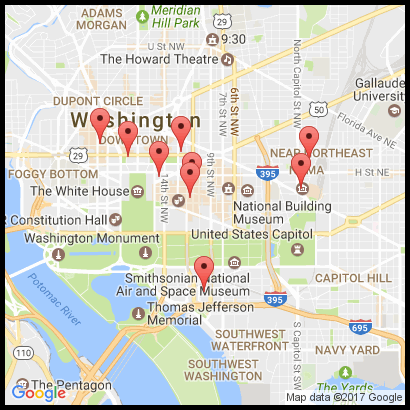

In [260]:
i = Image.open(BytesIO(r.content))
i = i.convert("RGBA")
new_img = ImageOps.expand(converted_image,border=5,fill='black')
new_img.save('C:/Users/Jonathan/DirectDebit/figures/test_image.png')

new_img

#####  Create function to return google map as png from banking services near address

In [240]:
# Define function that takes a list of markers and outputs a formatted map

def create_map_with_markers(markers, api_key):
    payload = {'size': '400x400', 
           'maptype': 'roadmap',
           'markers': markers,
               'key':api_key}
    r = requests.get('https://maps.googleapis.com/maps/api/staticmap?', params=payload)
    i = Image.open(BytesIO(r.content))
    converted_image = i.convert("RGBA")
    return ImageOps.expand(converted_image,border=5,fill='black')

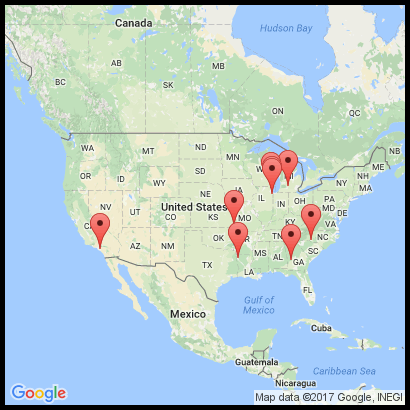

In [241]:
# test create_map_with_markers function

cc = create_map_with_markers(bb, api_key)
cc

## Generate PDFs based on bank locations and maps

## Search for banking services near office